In [20]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from gtda.graphs import TransitionGraph
from gtda.plotting import plot_point_cloud, plot_betti_curves, plot_diagram
from gtda.mapper import plot_static_mapper_graph
from gtda.homology import VietorisRipsPersistence
from gtda.diagrams import PersistenceEntropy, BettiCurve


In [2]:
path = "./manifolds/3D_manifolds/manifold_vae_graph_exp1_b10"
with open(path, 'rb') as file:
    manifold_g = pickle.load(file)
    
path = "./manifolds/3D_manifolds/manifold_vae_eucl_exp0_b10"
with open(path, 'rb') as file:
    manifold_e = pickle.load(file)


# Persistent homology 

In [3]:
VR = VietorisRipsPersistence(homology_dimensions=[0, 1, 2])
diagrams_e = VR.fit_transform(manifold_e[None, :1000, :])
diagrams_g = VR.fit_transform(manifold_g[None, :1000, :])
diagrams_g.shape

(1, 1286, 3)

In [4]:
plot_diagram(diagrams_e[0])

In [5]:
plot_diagram(diagrams_g[0])

In [35]:
BC = BettiCurve()
bc_e = BC.fit_transform(diagrams_e)
BC.plot(bc_e)


In [36]:
bc_g = BC.fit_transform(diagrams_g)
BC.plot(bc_g)


# Mapper

In [58]:
from sklearn.cluster import KMeans, DBSCAN

from gtda.mapper.cluster import FirstSimpleGap
from gtda.mapper import (
    CubicalCover,
    make_mapper_pipeline,
    Projection,
    plot_static_mapper_graph,
    plot_interactive_mapper_graph,
    MapperInteractivePlotter
)

In [62]:
cover = CubicalCover(n_intervals=10, overlap_frac=0.3)
clusterer = KMeans(n_clusters = 10)
# Configure parallelism of clustering step
n_jobs = 1

# Initialise pipeline
pipe = make_mapper_pipeline(
    cover=cover,
    clusterer=clusterer,
    verbose=False,
    n_jobs=n_jobs,
)

In [63]:
clusterer

KMeans(n_clusters=10)

In [66]:
fig = plot_static_mapper_graph(pipe, manifold_e)
fig.show(config={'scrollZoom': True})


ValueError: n_samples=1 should be >= n_clusters=10.

In [ ]:
fig = plot_static_mapper_graph(pipe, manifold_g[:, :])
fig.show(config={'scrollZoom': True})

# Graph Geodesic distance

In [95]:
from gtda.graphs import TransitionGraph, GraphGeodesicDistance
import pandas as pd

In [99]:
manifold_g = pd.DataFrame(manifold_g).sample(10000).to_numpy()

In [100]:
plot_point_cloud(manifold_g)

In [101]:
tg = TransitionGraph(func=None)
Xg_tg = tg.fit_transform(manifold_g[None, :, :])
Xg_geo = GraphGeodesicDistance(directed=False).fit_transform(Xg_tg)


In [102]:
Xg_geo[0].shape


(9988, 9988)

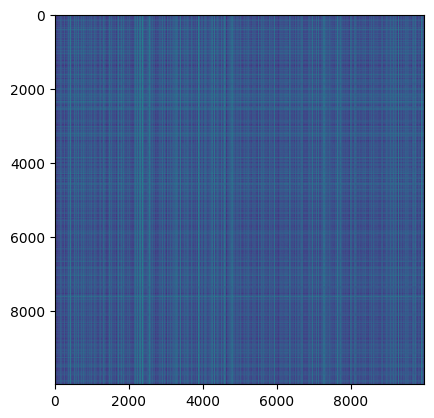

In [103]:
plt.imshow(Xg_geo[0])